In [1]:
import pandas as pd
import numpy as np

In [18]:
data = pd.read_csv('wrong_predictions.csv')


# Convert the string representations back to lists
import ast  # Safe eval for Python literals
data['waveform'] = data['waveform'].apply(ast.literal_eval)
data.head

<bound method NDFrame.head of                                                 waveform  TrueLabel  \
0      [-1.0406620750379925, -0.8445126251176561, -0....          1   
1      [4.915105079281328, 7.70988315994501, 10.73303...          0   
2      [-20.36218906111926, -20.421900864866227, -19....          1   
3      [0.02841416155469005, 0.604403705601508, 2.119...          0   
4      [19.97333772866248, 10.660426531627358, 1.8768...          0   
...                                                  ...        ...   
21091  [-3.4166879629529654, -2.161497386143672, 0.01...          0   
21092  [-2.97935210818767, -6.452986479282135, -7.282...          0   
21093  [134.81398484567808, 120.94542545933034, 101.3...          0   
21094  [-13.166684964345606, -14.190057978309119, -12...          0   
21095  [2.5252167243468264, 0.8216663095145034, -1.63...          0   

       Prediction  
0               0  
1               1  
2               0  
3               1  
4               1

In [3]:
import matplotlib.pyplot as plt

In [19]:
t = np.linspace(0, 75, 75)
waveform1 = data['waveform'][1]
len(waveform1)

75

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


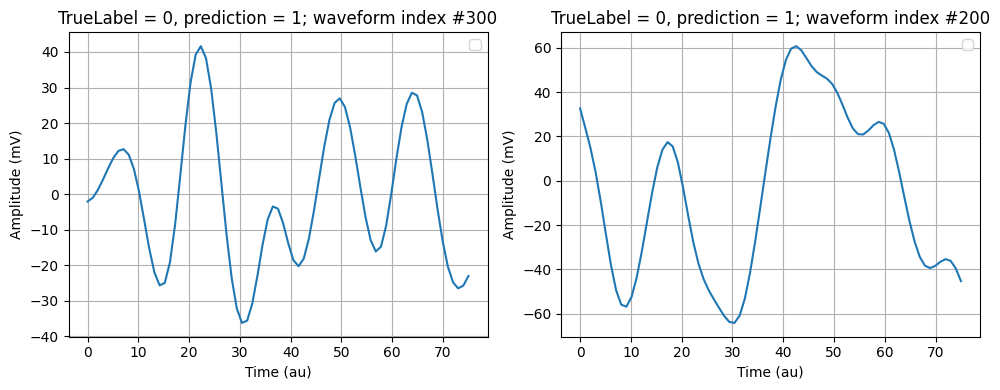

In [30]:
t = np.linspace(0, 75, 75)
def generate(i, j):
    waveform1 = data['waveform'][i]
    waveform2 = data['waveform'][j]
    label1 = 'TrueLabel = ' + str(data['TrueLabel'][i]) + ', prediction = ' + str(data['Prediction'][i]) + '; waveform index #'+ str(i)
    label2 = 'TrueLabel = ' + str(data['TrueLabel'][j]) + ', prediction = ' + str(data['Prediction'][j]) + '; waveform index #'+ str(j)
    return [waveform1, waveform2, label1, label2]
################
#### plot ######
################
[waveform1, waveform2, label1, label2] = generate(300, 200)

plt.figure(figsize=(10, 4))  # Set the figure size as needed

# Plot waveform 1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(t, np.array(waveform1))
plt.title(label1)
plt.xlabel('Time (au)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)
plt.legend()

# Plot sample noise
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(t, np.array(waveform2))
plt.title(label2)
plt.xlabel('Time (au)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)
plt.legend()

# Display the plots
plt.tight_layout()  # Adjust the layout to make room for the labels/titles
plt.show()